In [1]:
%load_ext autoreload
%autoreload 2

image ((940, 1880, 3))
gt_bboxes ((13, 4))
gt_labels ((13,))


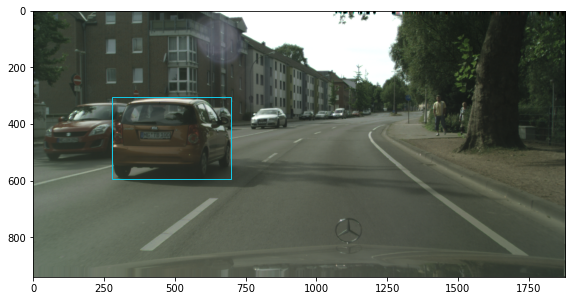

In [135]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

from thirdparty.dscv.utils.detection_utils import pixel2inch, visualize_bbox_xy, get_color_array


#################
### Load data ###
#################
image = np.asarray(Image.open(
    '/ws/data/cityscapes/leftImg8bit/train/monchengladbach/monchengladbach_000001_000537_leftImg8bit.png', 
    mode='r').resize((1880, 940)))

gt_bboxes = np.array(
    [[907.8711, 342.40234, 926.23047, 383.71094], 
     [1500.8789, 323.125, 1539.4336, 441.54297], 
     [1410., 298.33984, 1458.6523, 443.3789], 
     [34.882812, 325.8789, 334.14062, 530.58594],
     [636.15234, 342.40234, 703.16406, 421.34766],
     [1165.8203, 348.82812, 1193.3594, 368.10547],
     [277.22656, 306.60156, 698.5742, 594.84375],
     [767.4219, 343.3203, 896.85547, 420.4297], 
     [1123.5938, 354.33594, 1155.7227, 377.28516],
     [994.16016, 354.33594, 1042.8125, 386.46484],
     [937.2461, 354.33594, 995.9961, 390.13672],
     [1101.5625, 350.66406, 1112.5781, 380.03906],
     [1056.582, 345.15625, 1106.1523, 385.54688]])
gt_labels = np.array([0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


print(f"image ({image.shape})")
print(f"gt_bboxes ({gt_bboxes.shape})")
print(f"gt_labels ({gt_labels.shape})")

img_height, img_width = image.shape[0], image.shape[1]

fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(image)
color_array = get_color_array(num_colors=8)
for i in range(len(gt_bboxes)):
    i = 6
    visualize_bbox_xy(gt_bboxes[i], fig=fig, ax=ax,
                      color=color_array[int(gt_labels[i])])
    break
plt.show(fig)
plt.close(fig)

gt_bbox: [277 306 698 594]


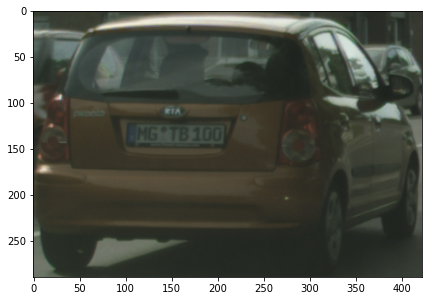

In [136]:
import copy


################################
### Crop the content in bbox ###
################################

index = 6

# Make bbox_content
_img = copy.deepcopy(image)
gt_bbox = np.array(gt_bboxes[index], dtype=np.uint32)
bbox_content = _img[gt_bbox[1]:gt_bbox[3]+1, gt_bbox[0]:gt_bbox[2]+1, :]


# Print info
print(f"gt_bbox: {gt_bbox}")


# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(bbox_content)
plt.show(fig)
plt.close(fig)

augmented_bbox_content ((940, 1880, 3))


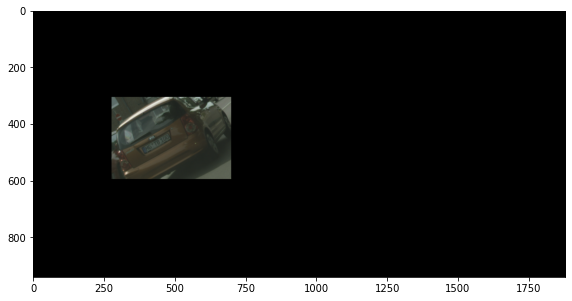

In [137]:
_img = copy.deepcopy(results['img'])
gt_bbox = np.array(gt_bboxes[index], dtype=np.uint32)
augmented_bbox_content = _img[gt_bbox[1]:gt_bbox[3]+1, gt_bbox[0]:gt_bbox[2]+1, :]


# Pad
augmented_bbox_content = np.pad(augmented_bbox_content, 
                                [[gt_bbox[1], img_height-1-gt_bbox[3]],
                                [gt_bbox[0], img_width-1-gt_bbox[2]],
                                [0, 0]], 
                                'constant')

# Print info
print(f"augmented_bbox_content ({augmented_bbox_content.shape})")

# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(augmented_bbox_content)
plt.show(fig)
plt.close(fig)

augmented_bbox_content ((289, 422, 3))
  > (50,50) = [60 50 42]


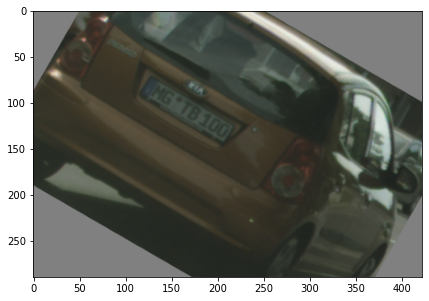

augmented_bbox_content ((940, 1880, 3))


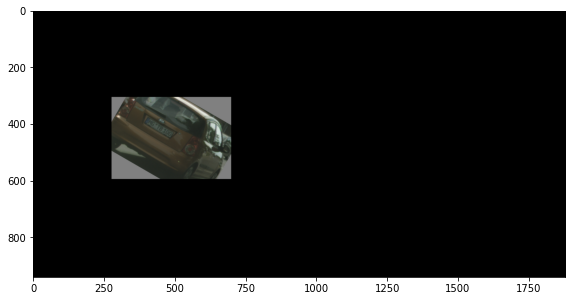

In [139]:

    
# augmentation_func = shear_x #shear_y
# augmentation_func = translate_x # translate_y
augmentation_func = rotate
# augmentation_func = color_transform
# augmentation_func = equalize_transform
# augmentation_func = brightness_transform
# augmentation_func = contrast_transform

# Augment bbox_content
augmented_bbox_content = augmentation_func(bbox_content)


# Print info
print(f"augmented_bbox_content ({augmented_bbox_content.shape})")
print(f"  > (50,50) = {augmented_bbox_content[50, 50]}")


# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(augmented_bbox_content)
plt.show(fig)
plt.close(fig)


# Pad
augmented_bbox_content = np.pad(augmented_bbox_content, 
                                [[gt_bbox[1], img_height-1-gt_bbox[3]],
                                [gt_bbox[0], img_width-1-gt_bbox[2]],
                                [0, 0]], 
                                'constant')

# Print info
print(f"augmented_bbox_content ({augmented_bbox_content.shape})")

# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(augmented_bbox_content)
plt.show(fig)
plt.close(fig)

mask ((940, 1880, 3))


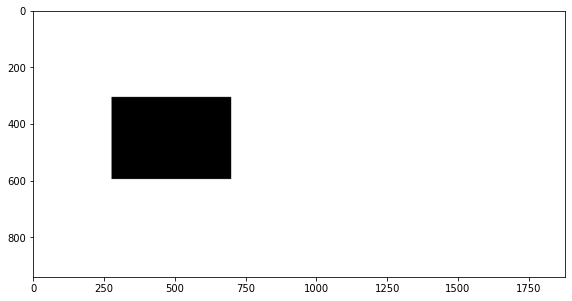

In [140]:
# Make mask
mask = np.zeros_like(bbox_content)
mask = np.pad(mask, 
              [[gt_bbox[1], img_height - 1 - gt_bbox[3]],
               [gt_bbox[0], img_width - 1 - gt_bbox[2]],
               [0, 0]],
              'constant',
              constant_values=1)


# Print info
print(f"mask ({mask.shape})")


# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(mask * 255)
plt.show(fig)
plt.close(fig)

_img ((940, 1880, 3))


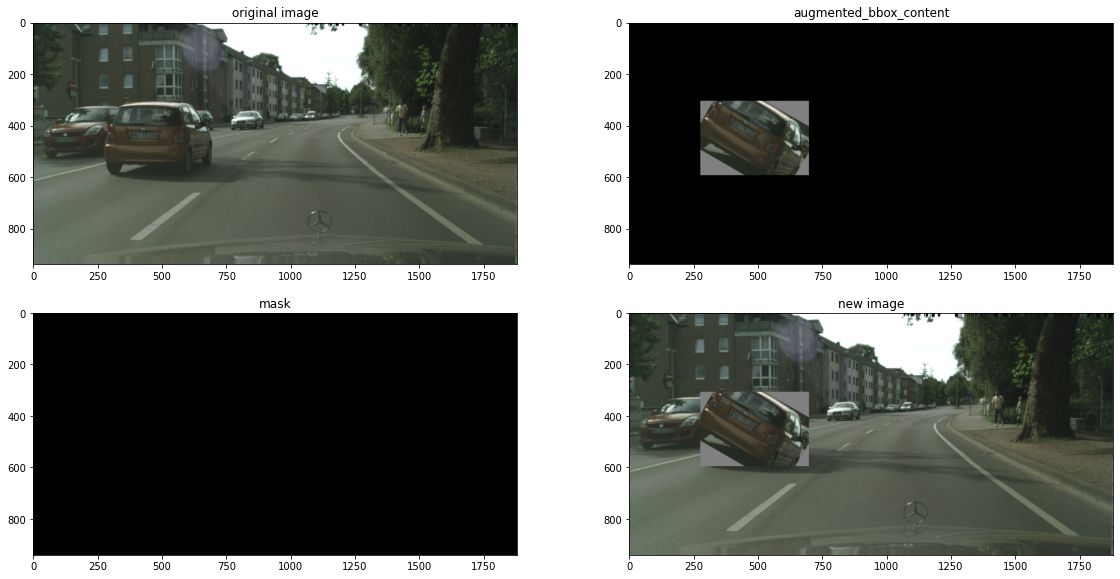

In [141]:
# Replace the old bbox content with the new augmented content
_img = copy.deepcopy(image)
_img = _img * mask + augmented_bbox_content


# Print info
print(f"_img ({_img.shape})")


# Visualize
fig, axes = plt.subplots(2,2, figsize=(pixel2inch(img_width),
                                     pixel2inch(img_height)))
axes[0,0].imshow(image)
axes[0,0].set_title('original image')
axes[0,1].imshow(augmented_bbox_content)
axes[0,1].set_title('augmented_bbox_content')
axes[1,0].imshow(mask)
axes[1,0].set_title('mask')
axes[1,1].imshow(_img)
axes[1,1].set_title('new image')
plt.show(fig)
plt.close(fig)

Another method

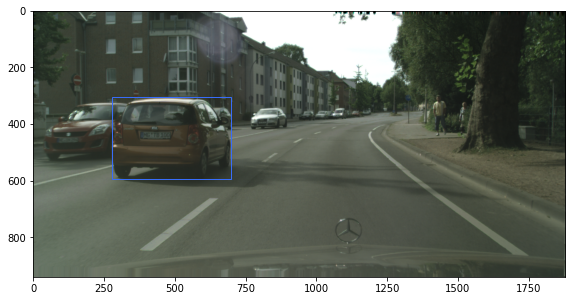

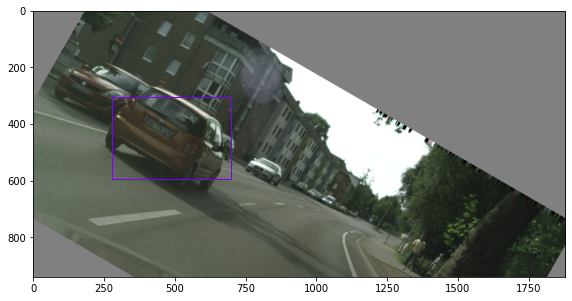

In [142]:
# Visualize
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
from thirdparty.dscv.utils.detection_utils import visualize_bbox_xy
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(image)
visualize_bbox_xy(gt_bbox, fig=fig, ax=ax, color_idx=1)
plt.show(fig)
plt.close(fig)

## Rotate
results = dict(img=copy.deepcopy(image))

cx = (gt_bbox[0] + gt_bbox[2]) / 2.
cy = (gt_bbox[1] + gt_bbox[3]) / 2.
aug = Rotate(level=10, center=(cx, cy), prob=1.0)

h, w = results['img'].shape[:2]
center = aug.center
if center is None:
    center = ((w - 1) * 0.5, (h - 1) * 0.5)
angle = random_negative(aug.angle, aug.random_negative_prob)
aug._rotate_img(results, angle, center, aug.scale)

# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(results['img'])
visualize_bbox_xy(gt_bbox, fig=fig, ax=ax)
plt.show(fig)
fig.suptitle('Rotated image')
plt.close(fig)

augmented_bbox_content ((940, 1880, 3))


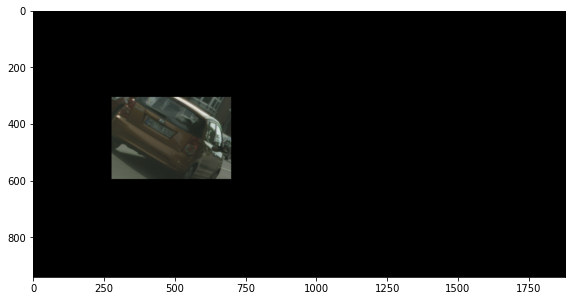

In [144]:
augmented_bbox_content = results['img'].copy()
augmented_bbox_content = augmented_bbox_content[gt_bbox[1]:gt_bbox[3]+1, gt_bbox[0]:gt_bbox[2]+1, :]


# Pad
augmented_bbox_content = np.pad(augmented_bbox_content, 
                                [[gt_bbox[1], img_height-1-gt_bbox[3]],
                                [gt_bbox[0], img_width-1-gt_bbox[2]],
                                [0, 0]], 
                                'constant')

# Print info
print(f"augmented_bbox_content ({augmented_bbox_content.shape})")

# Visualize
fig, ax = plt.subplots(1,1, figsize=(pixel2inch(img_width)/2,
                                     pixel2inch(img_height)/2))
ax.imshow(augmented_bbox_content)
plt.show(fig)
plt.close(fig)

_img ((940, 1880, 3))


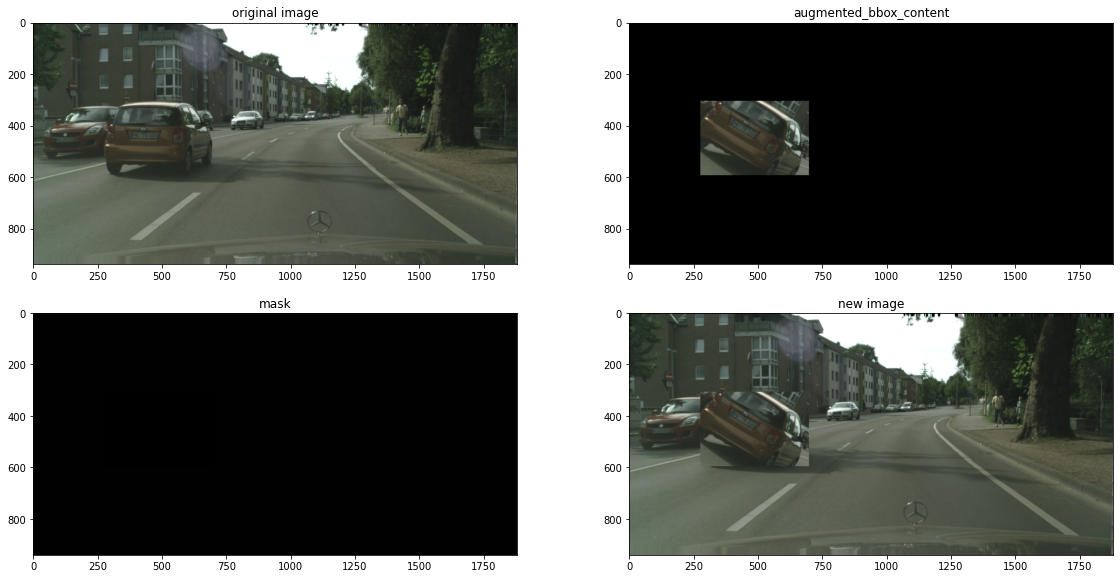

In [146]:
# Replace the old bbox content with the new augmented content
_img = copy.deepcopy(image)
_img = _img * mask + augmented_bbox_content


# Print info
print(f"_img ({_img.shape})")


# Visualize
fig, axes = plt.subplots(2,2, figsize=(pixel2inch(img_width),
                                     pixel2inch(img_height)))
axes[0,0].imshow(image)
axes[0,0].set_title('original image')
axes[0,1].imshow(augmented_bbox_content)
axes[0,1].set_title('augmented_bbox_content')
axes[1,0].imshow(mask)
axes[1,0].set_title('mask')
axes[1,1].imshow(_img)
axes[1,1].set_title('new image')
plt.show(fig)
plt.close(fig)